In [11]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import random
import numpy as np
import glob
import pandas as pd
from scipy.stats import genextreme
import joblib
from output.test import *
import matplotlib.pyplot as plt
import seaborn as sns
from pybdm import BDM
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'output/test'
all_files = glob.glob(os.path.join(FOLDER, '*'))
csv_files = {}
for file in all_files:
   if file.endswith('.csv'):
      csv_files[os.path.basename(file)] = pd.read_csv(file)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm


In [42]:
for key in csv_files.keys():
    print(key, csv_files[key].shape)

default_score200.0_r50_set2_2.csv (0, 1)
default_score200.0_r50_set2_0.csv (0, 1)
default_score200.0_r50_set2_1.csv (0, 1)
mature_score200.0_r50_set2_2.csv (81, 20)
mature_score200.0_r50_set2_0.csv (73, 20)
mature_score200.0_r50_set2_1.csv (98, 20)
agents_output_score200.0_r50_set2_1.csv (11871, 21)
agents_output_score200.0_r50_set2_0.csv (12009, 21)
agents_output_score200.0_r50_set2_2.csv (11980, 21)
model_output_score200.0_r50_set2_2.csv (10, 9)
model_output_score200.0_r50_set2_0.csv (10, 9)
model_output_score200.0_r50_set2_1.csv (10, 9)


In [37]:
print(csv_files.items())

dict_items([('default_score200.0_r50_set2_2.csv', Empty DataFrame
Columns: [Unnamed: 0]
Index: []), ('default_score200.0_r50_set2_0.csv', Empty DataFrame
Columns: [Unnamed: 0]
Index: []), ('default_score200.0_r50_set2_1.csv', Empty DataFrame
Columns: [Unnamed: 0]
Index: []), ('mature_score200.0_r50_set2_2.csv',     Unnamed: 0  step    id       score    x    y         u       income  \
0            0     2   929  228.000000  655   57  0.999487  6595.915414   
1            1     2   343  222.000000  375   70  0.995240  6026.751136   
2            2     2   623  228.000000  419  196  0.998430  4524.563738   
3            3     2   368  228.000000  377   61  0.993883  2702.743131   
4            4     2   236  224.000000  370   64  0.993658  1656.939262   
..         ...   ...   ...         ...  ...  ...       ...          ...   
84          84    18  1129  222.444444  661   47  0.995602  5000.000000   
85          85    18   759  222.444444  600  164  0.998152  1770.854233   
86          

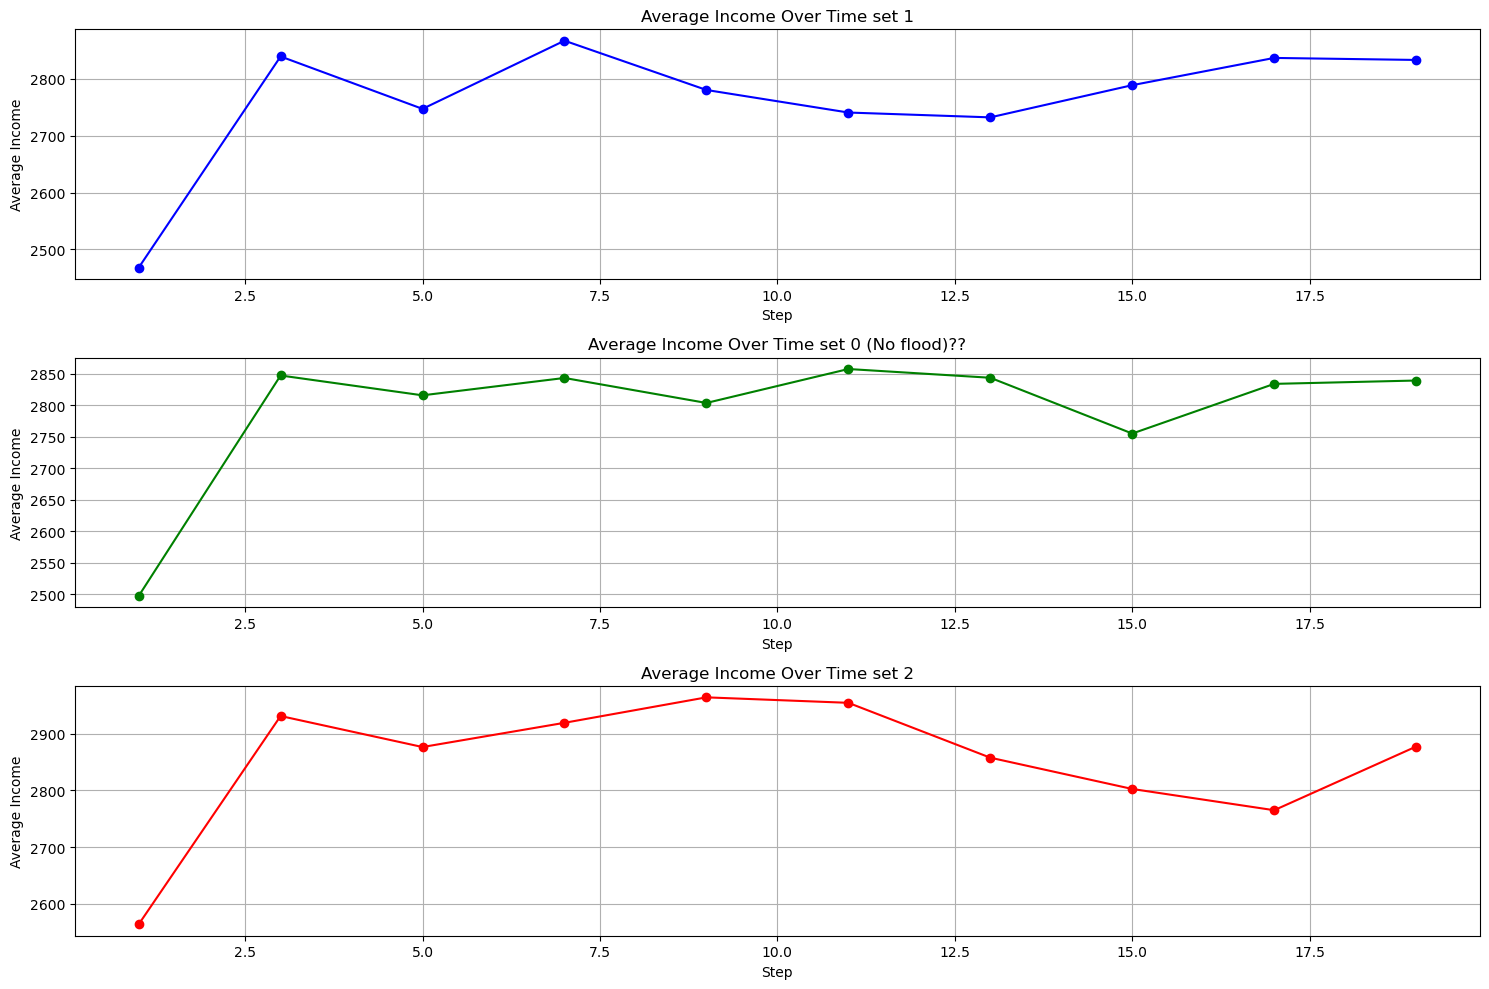

In [46]:
df1 = csv_files['agents_output_score200.0_r50_set2_1.csv']
df2 = csv_files['agents_output_score200.0_r50_set2_0.csv']
df3 = csv_files['agents_output_score200.0_r50_set2_2.csv']

aggregated_income1 = df1.groupby('Step')['income'].mean()
aggregated_income2 = df2.groupby('Step')['income'].mean()
aggregated_income3 = df3.groupby('Step')['income'].mean()

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(aggregated_income1.index, aggregated_income1.values, marker='o', linestyle='-', color='b')
plt.title('Average Income Over Time set 1')
plt.xlabel('Step')
plt.ylabel('Average Income')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(aggregated_income2.index, aggregated_income2.values, marker='o', linestyle='-', color='g')
plt.title('Average Income Over Time set 0 (No flood)??')
plt.xlabel('Step')
plt.ylabel('Average Income')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(aggregated_income3.index, aggregated_income3.values, marker='o', linestyle='-', color='r')
plt.title('Average Income Over Time set 2')
plt.xlabel('Step')
plt.ylabel('Average Income')
plt.grid(True)

plt.tight_layout()
plt.show()

### Figure 4.3 and Figure 4.4

In [56]:
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'output/test2'
all_files = glob.glob(os.path.join(FOLDER, '*'))
csv_files = {}
for file in all_files:
   if file.endswith('.csv') and 'model_output_score' in os.path.basename(file):
      csv_files[os.path.basename(file)] = pd.read_csv(file)
for filename in csv_files:
    print(f"Loaded {filename} Shape {csv_files[filename].shape}")
#rename the first column to Step
for key in csv_files.keys():
   csv_files[key] = csv_files[key].rename(columns={'Unnamed: 0': 'Step'})
   print(key, csv_files[key].shape)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm
Loaded model_output_score200.0_r50_set3_9.csv Shape (154, 9)
Loaded model_output_score200.0_r50_set3_8.csv Shape (149, 9)
Loaded model_output_score200.0_r50_set1_8.csv Shape (150, 9)
Loaded model_output_score200.0_r50_set1_9.csv Shape (146, 9)
Loaded model_output_score200.0_r50_set4_9.csv Shape (148, 9)
Loaded model_output_score200.0_r50_set4_8.csv Shape (149, 9)
Loaded model_output_score200.0_r50_set0_8.csv Shape (144, 9)
Loaded model_output_score200.0_r50_set0_9.csv Shape (144, 9)
Loaded model_output_score200.0_r50_set2_9.csv Shape (146, 9)
Loaded model_output_score200.0_r50_set2_8.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set0_7.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set2_5.csv Shape (146, 9)
Loaded model_output_score200.0_r50_set4_3.csv Shape (150, 9)
Loaded model_output_score200.0_r50_set4_2.csv Shape (150, 9)
Loaded model_output_score200.0_r50_set2_4.cs

In [57]:
set0_files = {k: v for k, v in csv_files.items() if 'set0' in k}
set1_files = {k: v for k, v in csv_files.items() if 'set1' in k}
set2_files = {k: v for k, v in csv_files.items() if 'set2' in k}
set3_files = {k: v for k, v in csv_files.items() if 'set3' in k}
set4_files = {k: v for k, v in csv_files.items() if 'set4' in k}


# Concatenate the DataFrames for each set
set0_df = pd.concat(set0_files.values(), ignore_index=True) if set0_files else pd.DataFrame()
set1_df = pd.concat(set1_files.values(), ignore_index=True) if set1_files else pd.DataFrame()
set2_df = pd.concat(set2_files.values(), ignore_index=True) if set2_files else pd.DataFrame()
set3_df = pd.concat(set3_files.values(), ignore_index=True) if set3_files else pd.DataFrame()
set4_df = pd.concat(set4_files.values(), ignore_index=True) if set4_files else pd.DataFrame()

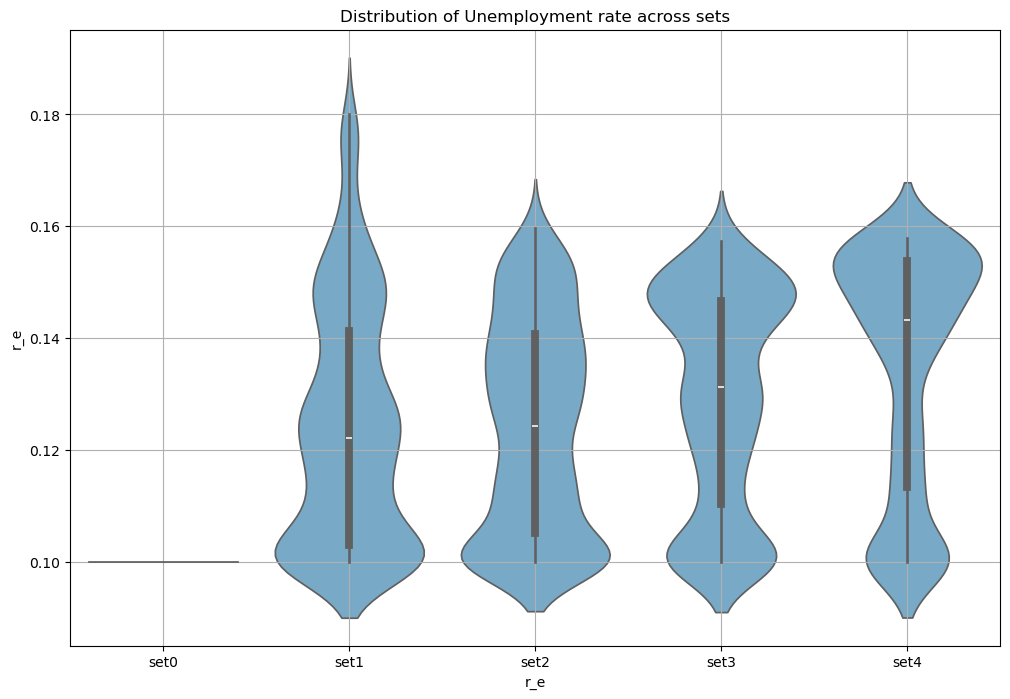

In [85]:
cmap = plt.get_cmap("Blues")
colors = [cmap(0.5)]
plt.figure(figsize=(12, 8))
for dataset in [set0_df, set1_df, set2_df, set3_df, set4_df]:
    sns.violinplot(data=dataset, x='set', y='r_e', hue='set', palette=colors, legend=False)
plt.title('Distribution of Unemployment rate across sets')
plt.xlabel('r_e')
plt.grid(True)
plt.show()

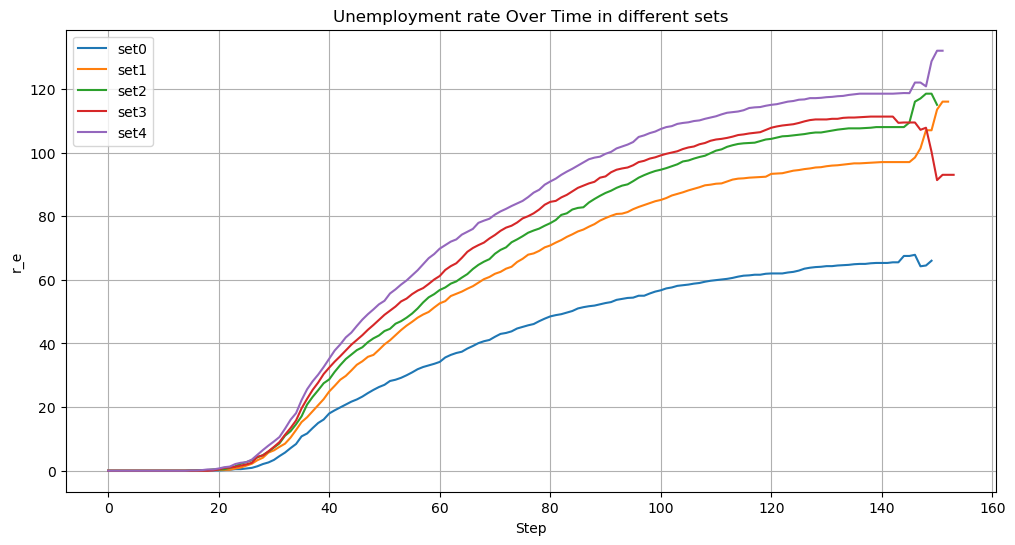

In [82]:
plt.figure(figsize=(12, 6))
for dataset in [set0_df, set1_df, set2_df, set3_df, set4_df]:
   aa = dataset.groupby('Step')['num_default'].mean()
   plt.plot(aa.index, aa.values, linestyle='-', label=dataset['set'].values[0])
plt.title('Unemployment rate Over Time in different sets')
plt.xlabel('Step')
plt.ylabel('r_e')
plt.legend()  
plt.grid(True) 
plt.show()

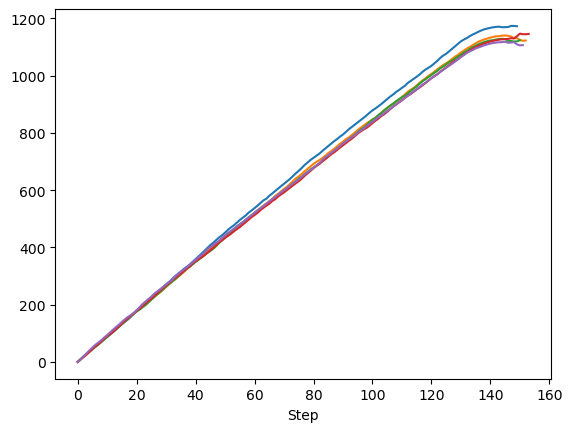

In [76]:
for dataset in [set0_df, set1_df, set2_df, set3_df, set4_df]:
   dataset.groupby('Step')['num_mature'].mean().plot()

In [7]:
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'output/test4'
all_files = glob.glob(os.path.join(FOLDER, '*'))
csv_files = {}
for file in all_files:
   if file.endswith('.csv') and 'model_output_score' in os.path.basename(file):
      csv_files[os.path.basename(file)] = pd.read_csv(file)
for filename in csv_files:
    print(f"Loaded {filename} Shape {csv_files[filename].shape}")
#rename the first column to Step
for key in csv_files.keys():
   csv_files[key] = csv_files[key].rename(columns={'Unnamed: 0': 'Step'})
   print(key, csv_files[key].shape)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm
Loaded model_output_score200.0_r50_set3_9.csv Shape (151, 9)
Loaded model_output_score200.0_r50_set3_8.csv Shape (157, 9)
Loaded model_output_score200.0_r50_set1_8.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set1_9.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set4_9.csv Shape (148, 9)
Loaded model_output_score200.0_r50_set4_8.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set0_8.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set0_9.csv Shape (151, 9)
Loaded model_output_score200.0_r50_set2_9.csv Shape (151, 9)
Loaded model_output_score200.0_r50_set2_8.csv Shape (148, 9)
Loaded model_output_score200.0_r50_set0_7.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set2_5.csv Shape (147, 9)
Loaded model_output_score200.0_r50_set4_3.csv Shape (152, 9)
Loaded model_output_score200.0_r50_set4_2.csv Shape (149, 9)
Loaded model_output_score200.0_r50_set2_4.cs

In [8]:
set0_files = {k: v for k, v in csv_files.items() if 'set0' in k}
set1_files = {k: v for k, v in csv_files.items() if 'set1' in k}
set2_files = {k: v for k, v in csv_files.items() if 'set2' in k}
set3_files = {k: v for k, v in csv_files.items() if 'set3' in k}
set4_files = {k: v for k, v in csv_files.items() if 'set4' in k}

# Add 'set' column to each DataFrame
for k, v in set0_files.items():
    v['set'] = 'set0'
for k, v in set1_files.items():
    v['set'] = 'set1'
for k, v in set2_files.items():
    v['set'] = 'set2'
for k, v in set3_files.items():
    v['set'] = 'set3'
for k, v in set4_files.items():
    v['set'] = 'set4'

# Concatenate the DataFrames for each set
set0_df = pd.concat(set0_files.values(), ignore_index=True) if set0_files else pd.DataFrame()
set1_df = pd.concat(set1_files.values(), ignore_index=True) if set1_files else pd.DataFrame()
set2_df = pd.concat(set2_files.values(), ignore_index=True) if set2_files else pd.DataFrame()
set3_df = pd.concat(set3_files.values(), ignore_index=True) if set3_files else pd.DataFrame()
set4_df = pd.concat(set4_files.values(), ignore_index=True) if set4_files else pd.DataFrame()


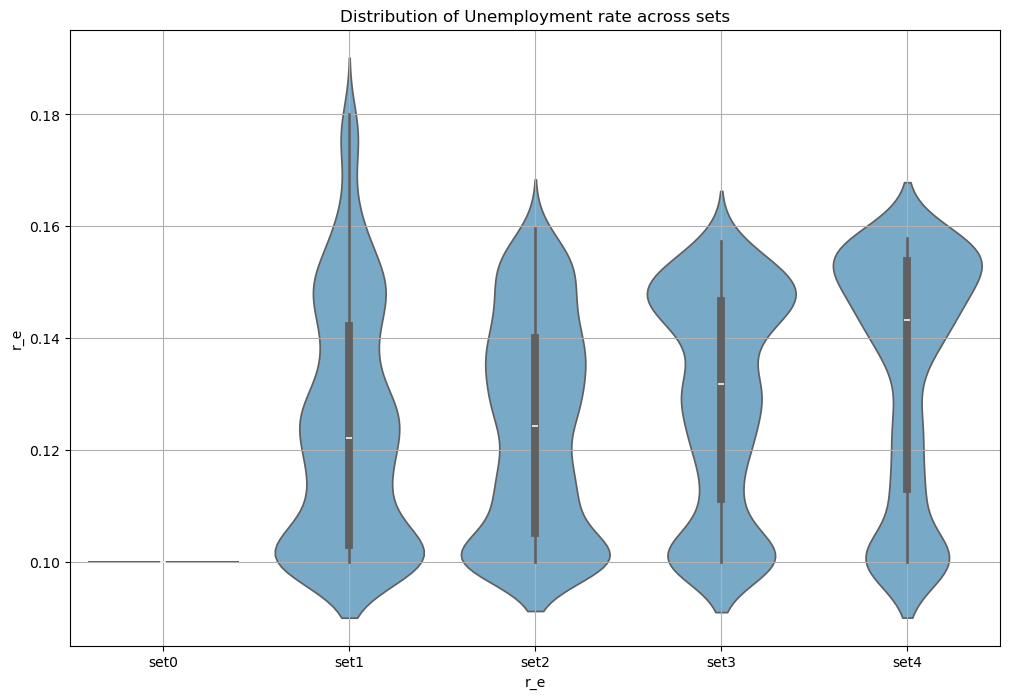

In [9]:

cmap = plt.get_cmap("Blues")
colors = [cmap(0.5)]
plt.figure(figsize=(12, 8))
for dataset in [set0_df, set1_df, set2_df, set3_df, set4_df]:
    sns.violinplot(data=dataset, x='set', y='r_e', hue='set', palette=colors, legend=False)
plt.title('Distribution of Unemployment rate across sets')
plt.xlabel('r_e')
plt.grid(True)
plt.show()

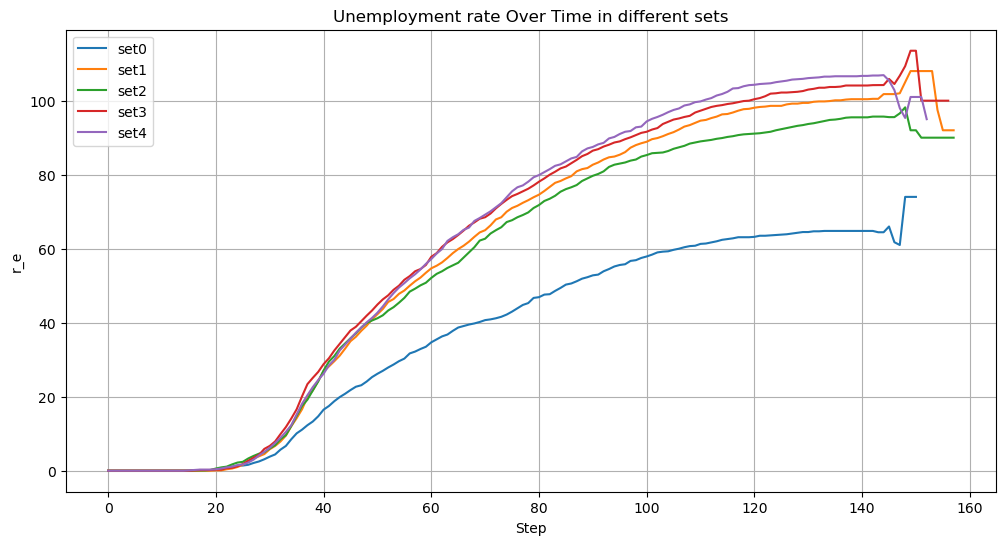

In [ ]:
plt.figure(figsize=(12, 6))
for dataset in [set0_df, set1_df, set2_df, set3_df, set4_df]:
   aa = dataset.groupby('Step')['num_default'].mean()
   plt.plot(aa.index, aa.values, linestyle='-', label=dataset['set'].values[0])
plt.title('Unemployment rate Over Time in different sets')
plt.xlabel('Step')
plt.ylabel('r_e')
plt.legend()
plt.grid(True) 
plt.show()

------
## Static results

600 simulation steps and new joiners

variables:
- Number of default.
- Unemployment rate (r_e)
- Ratio of default status(?)
- House price deduction (?)

In [ ]:
#test5 folder

---

## Stacked scenario: Kolmogorov Complexity based on BDM


In [ ]:
bdm = BDM(ndim=1)

def compute_kc(series):
   """Compute Kolmogorov Complexity (KC) using BDM given a series.
      Args:
         series (np.ndarray): Input series.
   """
   return bdm.bdm(series)

def rolling_kc(data, window_size=30, strip=1, rolling_mean_window=20):
   """Compute KC for overlapping slices with a rolling mean."""
   # Step 1: Generate overlapping slices
   slices = [data[i:i + window_size] for i in range(0, len(data) - window_size + 1, strip)]
   
   # Step 2: Compute KC for each slice
   kc_values = [compute_kc(slice) for slice in slices]
   
   # Step 3: Convert KC values to a DataFrame for rolling mean computation
   kc_series = pd.Series(kc_values)
   
   # Step 4: Apply rolling mean
   smoothed_kc = kc_series.rolling(window=rolling_mean_window).mean()
   
   return smoothed_kc

# Example Usage
# Generate some sample data
data = np.random.randn(1000)  # Example data series

# Compute the rolling KC series
result = rolling_kc(data)

# Display the results
print(result)